<a href="https://colab.research.google.com/github/mehedi832766/Data_preprocessing_hacks83--/blob/AugmentationAndNumpyToH5Format/Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
from keras.preprocessing.image import ImageDataGenerator
import os
from glob import glob
import numpy as np
import h5py


In [ ]:
root='/content/drive/MyDrive/Thesis/Split_data_BG/train'

In [ ]:
# pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import splitfolders

In [ ]:
# input_folder = '/content/drive/MyDrive/Thesis/Main_Sign_Data'

In [ ]:
# splitfolders.ratio(root, output="/content/drive/MyDrive/Thesis/Split_data_BG",
#                    seed=42,ratio=(.7,.2,.1))

Copying files: 1933 files [13:41,  2.35 files/s]


In [ ]:
datagen = ImageDataGenerator(
        rotation_range=15,
      # width_shift_range=0.1,
      height_shift_range=0.1,
      # brightness_range=[.2,.8],
      # shear_range = 0.1,
      zoom_range = 0.1,
      # vertical_flip = True,
      validation_split=0.2,
      fill_mode='reflect'
        )

In [ ]:
for folder in os.listdir(root):
  sub = os.path.join(root,folder)
  tar = os.path.join('/content/drive/MyDrive/DATASets/Folder_wise/train_only_BG',folder)
  os.mkdir(tar)
  for img in os.listdir(sub):
    img = load_img(os.path.join(sub,img))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    # the .flow() command below generates batches of randomly transformed images
    # and saves the results to the `preview/` directory
    i = 0
    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir=tar, save_prefix=folder, save_format='jpeg'):
        i += 1
        if i >= 2:
            break  # otherwise the generator would loop indefinitely

In [ ]:
# class_names = ['@1. A', '@2. AA', '@3. E', '@4. U', '@5. Y', '@6. O','1.KA', '2. KHA', '3. GA', '4. GHA', '5. CHA', '6. SCHA', '7. JA', '8. JHA', '9. TA', '10. THA', '11. DA', '12. DHA', '13. TO', '14. THO', '15. DO', '16. DHO', '17. NA', '18. PA', '19. PHA', '20. BA', '21. BHA', '22. MA', '23. YA', '24. RA', '25. LA', '26. SA', '27. HA', '28. RHA', '29. UN', '30. BI', 'joint', 'space', 'stop']
# class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
# IMAGE_SIZE = [224, 224]
# nb_classes = len(class_names)

#For multiple datasets

In [ ]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['/content/drive/MyDrive/Thesis/Augmented/train_BG','/content/drive/MyDrive/Thesis/Split_data_BG/val','/content/drive/MyDrive/Thesis/Split_data_BG/test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [ ]:
(train_images,train_labels),(val_images,val_labels),(test_images,test_labels) = load_data()

#For single dataset

In [ ]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    
    dataset = '/content/drive/MyDrive/Thesis/Augmented/train_BG'
    output = []

    images = []
    labels = []
    
    print("Loading {}".format(dataset))
    # Iterate through each folder corresponding to a category
    for folder in os.listdir(dataset):
        label = class_names_label[folder]
        # Iterate through each image in our folder
        for file in tqdm(os.listdir(os.path.join(dataset, folder))):
            
            # Get the path name of the image
            img_path = os.path.join(os.path.join(dataset, folder), file)
            
            # Open and resize the img
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, IMAGE_SIZE) 
            
            # Append the image and its corresponding label to the output
            images.append(image)
            labels.append(label)
            
    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')   
    
    output.append(images)
    output.append(labels)

    return output

In [ ]:
train_images,train_labels= load_data()

Loading /content/drive/MyDrive/Thesis/Augmented/train_BG


100%|██████████| 76/76 [00:15<00:00,  4.76it/s]


#check numpy conversion

In [ ]:
train_images.shape

(2664, 224, 224, 3)

In [ ]:
train_labels.shape

(2664,)

In [ ]:
train_images = train_images / 255.0 

In [ ]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

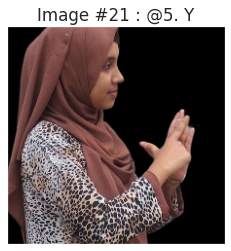

In [ ]:
display_random_image(class_names, train_images, train_labels)

#converting to h5

In [ ]:
# Python program to demonstrate
# HDF5 file


# # initializing a random numpy array


# creating a file
# with h5py.File('/content/drive/MyDrive/DATASets/augment220323_BG.h5', 'a') as f:
# 	dset = f.create_dataset("train_images_v2", data = train_images)
# 	dset = f.create_dataset("train_labels_v2", data = train_labels)

In [ ]:
with h5py.File('/content/drive/MyDrive/DATASets/sign_main.h5', 'r') as f:

  #list of datasets
  ls=list(f.keys())
  print(ls)

['images', 'labels', 'test_images', 'test_labels', 'train_images', 'train_labels']


In [ ]:
with h5py.File('/content/drive/MyDrive/DATASets/sign_main.h5', 'r') as f:

  #list of datasets
  
  data=f.get('labels')
  test_labels=np.array(data)
  print(test_labels.shape)
  data=f.get('test_labels')
  test_labels=np.array(data)
  print(test_labels.shape)
  data=f.get('train_labels')
  test_labels=np.array(data)
  print(test_labels.shape)

(1939,)
(405,)
(1534,)


In [ ]:
with h5py.File('/content/drive/MyDrive/DATASets/sign.h5', 'r') as f:

  #list of datasets
  ls=list(f.keys())
  print(ls)

['test_images', 'test_labels', 'train_images', 'train_labels']


In [ ]:
with h5py.File('/content/drive/MyDrive/DATASets/sign.h5', 'r') as f:

  #list of datasets
  data=f.get('test_labels')
  test_labels=np.array(data)
  print(test_labels.shape)
  data=f.get('train_labels')
  test_labels=np.array(data)
  print(test_labels.shape)

(224,)
(1343,)
